# Desafío - Clasificación desde Machine Learning

## Descripción
En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco.
Dentro de ésta se registran las siguientes observaciones:
<ul>
<li><code>default</code>: Variable binaria. Registra si el cliente entró en morosidad o no.</li>
<li><code>income</code>: Ingreso promedio declarado por el cliente.</li>
<li><code>balance</code>: Total de saldo en la cuenta de crédito.</li>
<li><code>student</code>: Variable binaria. Registra si el cliente es estudiante o no.</li>
</ul>

## Desafío 1: Preparación del ambiente de trabajo
<ul>
<li>Importe los módulos básicos para el análisis de datos</li>
<li>Importe <code>seaborn</code>.</li>
<li>Importe <code>statsmodels</code>.</li>
<li>Importe <code>LogisticRegression</code>, <code>train_test_split</code>, <code>StandardScaler</code>,
<code>classification_report</code> y <code>roc_curve</code> de <code>sklearn</code>.</li>
</ul>


In [174]:
# Se importan las librerías
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, classification_report,roc_auc_score
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (4, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"]= 200 # resolución gráficos

In [175]:
# Se importa el set de datos y se realiza la limpieza correspondiente.

df = pd.read_csv('default_credit.csv').drop(columns=['index'])
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


## Desafío 2: Análisis exploratorio
<ul>
<li>Explore las principales relaciones entre las variables. Utilizando los métodos
<code>boxplot</code> y <code>lmplot</code> de <code>seaborn</code> implemente los siguientes gráficos.
<ul>
<li>Un <code>boxplot</code> del balance total de las cuentas, segmentado por el status de
estudiante.</li>
<li>Un <code>boxplot</code> del ingreso total de cada cliente, segmentado por el status de
estudiante.</li>
<li>Un <code>boxplot</code> del balance total de las cuentas, segmentado por el status de
default.</li>
<li>Un <code>boxplot</code> del ingreso total de cada cliente, segmentado por el status de
default.</li>
<li>Un diagrama de dispersión entre <code>balance</code> e <code>income</code>, segmentado por el status
de estudiante.</li>
<li>Un diagrama de dispersión entre <code>balance</code> e <code>income</code>, segmentado por el status
de default.</li>
</ul>
</li>
<li>Comente brevemente sobre los principales patrones de comportamiento.</li>
<li> <b>tip</b>: Puede utilizar el argumento <code>hue</code> en <code>lmplot</code> para identificar las observaciones por
status.</li>
</ul>


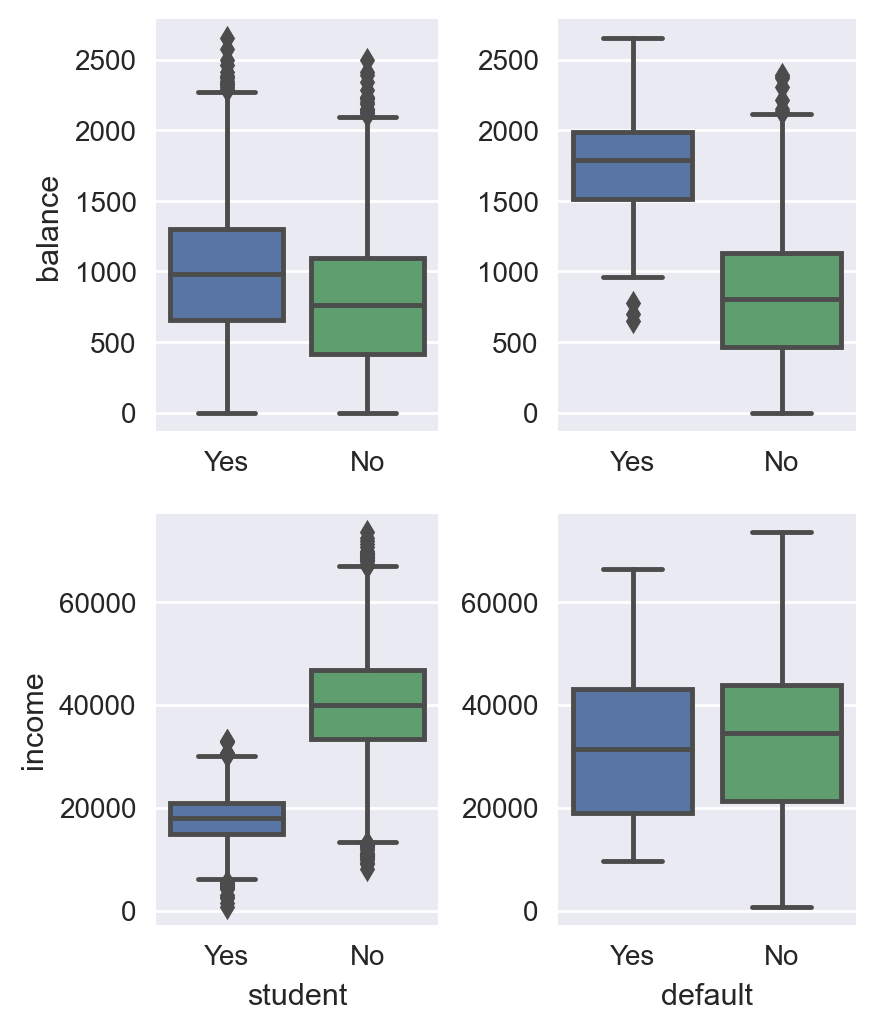

In [176]:
fig, axes = plt.subplots(2, 2)
# Boxplots de Student y balance e income
sns.boxplot(x='student', y="balance", data=df, order=['Yes', 'No'], ax=axes[0][0])
sns.boxplot(x='student', y="income", data=df, order=['Yes', 'No'], ax=axes[1][0])
# Boxplots de Default y balance e income
sns.boxplot(x='default', y="balance", data=df, order=['Yes', 'No'], ax=axes[0][1])
sns.boxplot(x='default', y="income", data=df, order=['Yes', 'No'], ax=axes[1][1])
# Arreglar margenes de gráficos
for i in range(2):
    box = axes[i][1].get_position()
    box.x0 = box.x0 + 0.08
    box.x1 = box.x1 + 0.1
    axes[i][1].set_ylabel(None)
    axes[0][i].set_xlabel(None)
    axes[i][1].set_position(box)

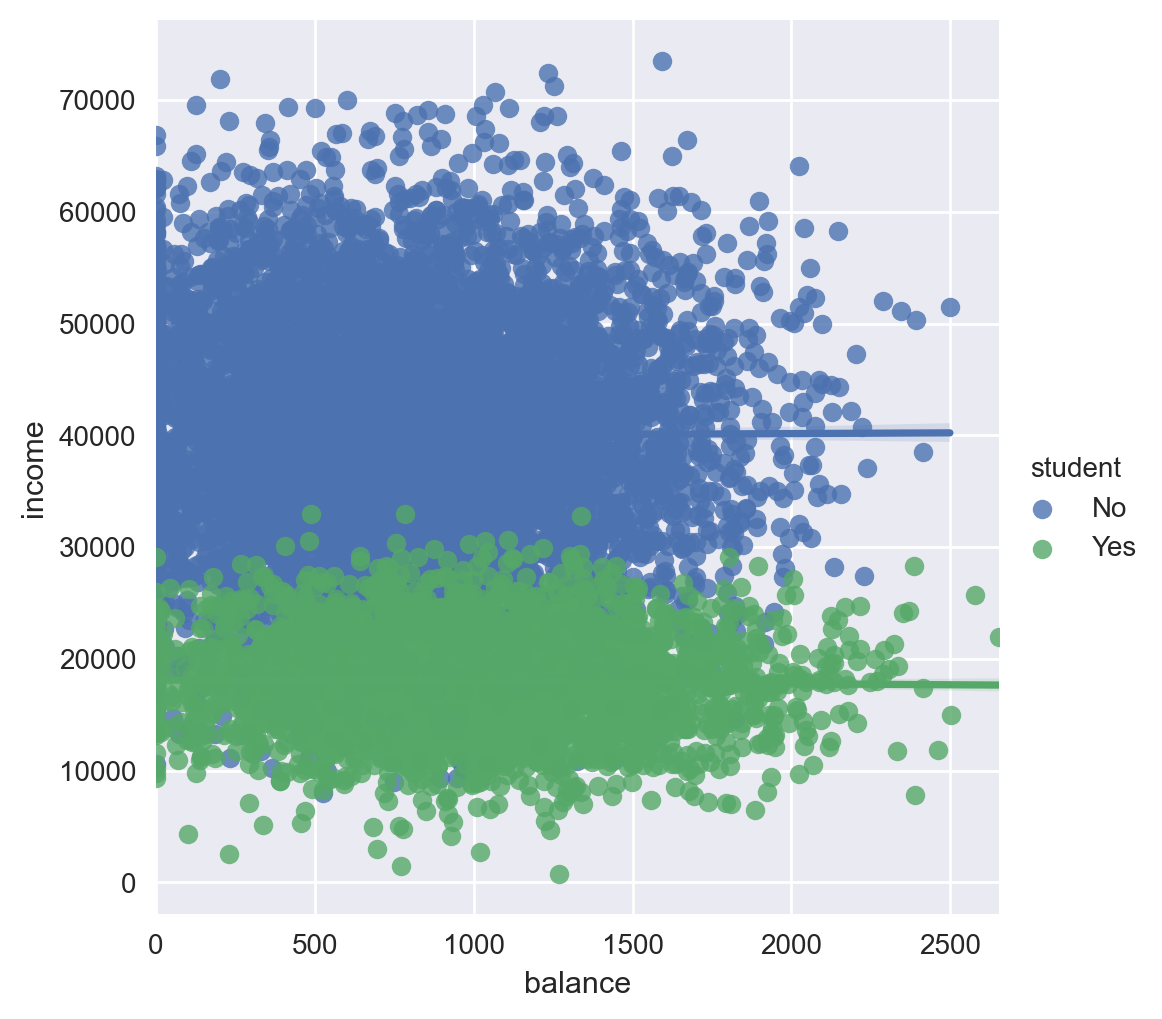

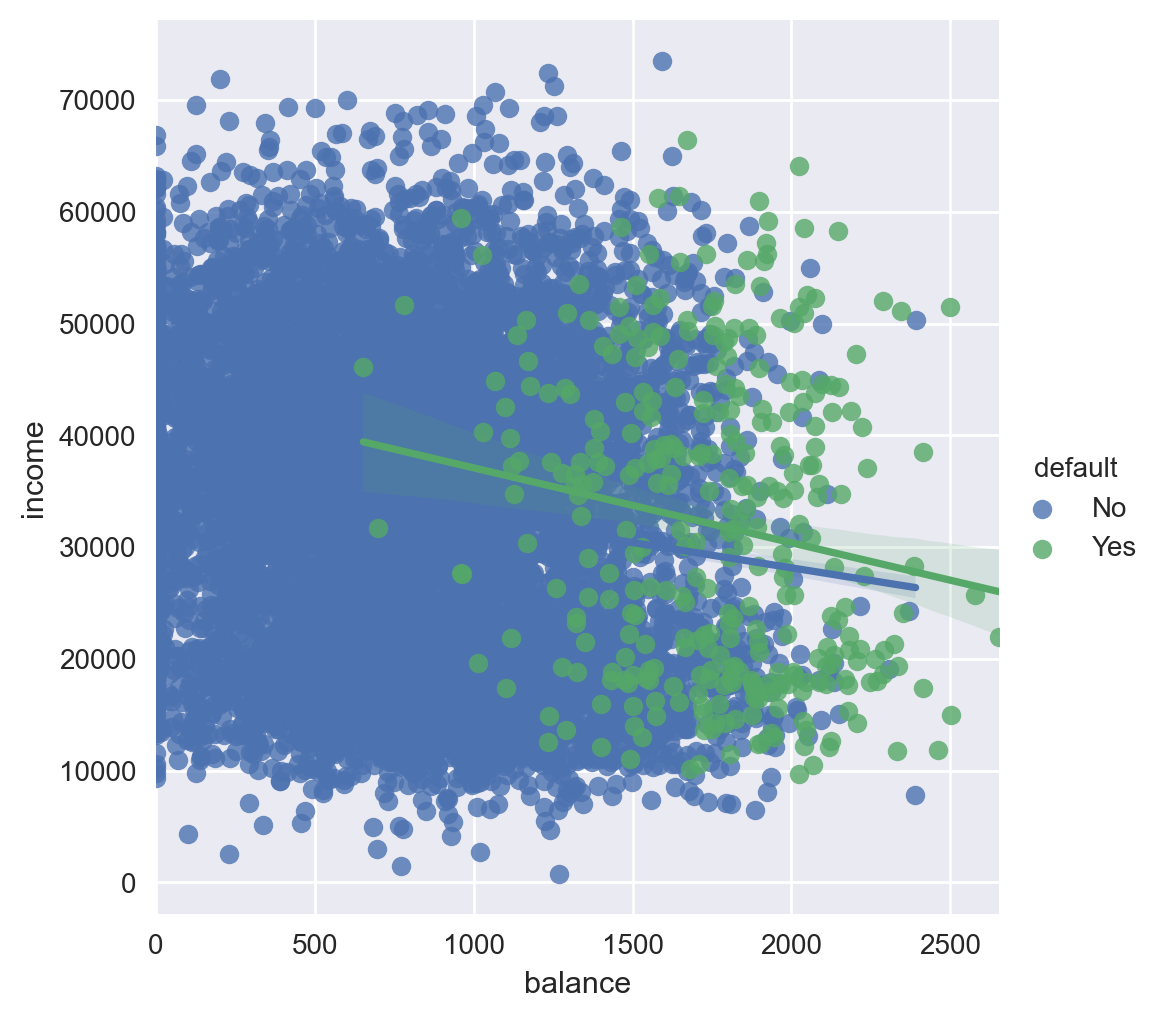

In [177]:
sns.lmplot(x='balance', y='income', data=df, hue="student", sharey=True)
sns.lmplot(x='balance', y='income', data=df, hue="default", sharey=True)

Podemos observar que para <code>student</code> y <code>default</code>, la relación con <code>balance</code> se mantiene parecida, mientras que con <code>income</code> se nota una gran diferencia entre los gráficos de caja resultantes.

## Desafío 3: Modelación econométrica
<ul>
<li>Recodifique las variables student y default para que adquieran atributos numéricos.</li>
<li>Implemente el siguiente modelo econométrico:

$$
    log(\frac{Pr(default=1)}{1-Pr(default=1)}) = \beta_0 + \beta_1 \cdot balance + \beta_2 \cdot income + \beta_3 \cdot student
$$
</li>
<li>A partir de este modelo, depúrelo y mantenga las principales características. Ejecute
de nuevo el modelo y comente brevemente sobre el comportamiento de los
atributos.</li>
</ul>


In [178]:
print(df['student'].value_counts())
print(df['default'].value_counts())

No     7056
Yes    2944
Name: student, dtype: int64
No     9667
Yes     333
Name: default, dtype: int64


In [179]:
parsedDf = df.copy()
parsedDf['student'] = np.where(parsedDf['student'] == 'Yes', 1, 0)
parsedDf['default'] = np.where(parsedDf['default'] == 'Yes', 1, 0)

In [180]:
model = smf.logit("default ~ balance + income + student", parsedDf).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.4619
Time:                        13:48:24   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [189]:
model = smf.logit("default ~ balance + student", parsedDf).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.4619
Time:                        14:24:36   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance        0.0057      0.000     24.748      0.000       0.005       0.006
student       -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Podemos notar que al depurar el modelo se consigue una muy leve mejora de rendimiento, pues <code>Pseudo R-squ</code> se mantiene constante y se observa una leve mejora al disminuir <code>LLR p-value</code> en un orden de magnitud. También podemos fijarnos que al eliminar <code>income</code>, el coeficiente de <code>balance</code> se mantiene constante y el error cuadrático de los otros coeficientes (<code>income</code> e <code>Intercept</code>) disminuye.

## Desafío 4: Entrenar
A partir del modelo depurado, genere un modelo predictivo con las siguientes
características:
<ul>
<li>Genere subconjuntos de entrenamiento y pruebas, separando el 33% de la muestra
en el conjunto de pruebas.</li>
<li>Estandarice las matrices de atributos de entrenamiento y pruebas usando
StandardScaler() ajustado solo sobre el conjunto de entrenamiento.</li>
<li>Implemente el modelo sin alterar los hiper parámetros.</li>
<li>Genere la predicción de las clases y de la probabilidad.</li>
<li>Reporte las métricas de precisión, recall y f1 para ambas clases.</li>
<li>Grafique la curva Receiver Operator Characteristic.</li>
<li>En base a los pasos, comente sobre el desempeño predic</li>
</ul>

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3200
           1       0.67      0.35      0.46       100

    accuracy                           0.98      3300
   macro avg       0.83      0.67      0.72      3300
weighted avg       0.97      0.98      0.97      3300

0.5287499999999999


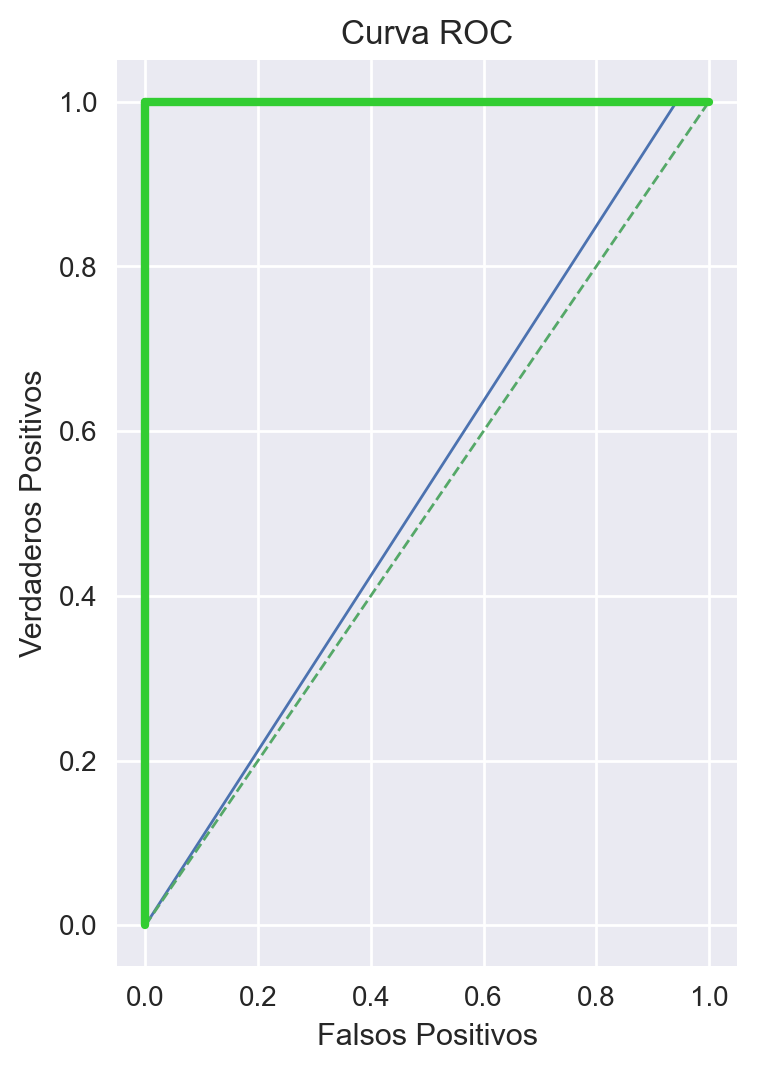

In [188]:
# se generan los subconjuntos de entrenamiento con un seed fijo para obtener siempre los mismos resultados
x_train, x_test, y_train, y_test = train_test_split(parsedDf.loc[:, 'student' : 'balance'], parsedDf['default'], test_size=.33, random_state=19137)
# se estandarizan las matrices
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std = StandardScaler().fit_transform(x_test)

# Se implementa el modelo usando sklearn
default_model = LogisticRegression().fit(x_train_std, y_train)

# se consiguen las predicciones para el conjunto de testeo
y_test_predict = default_model.predict(x_test_std)
y_test_predict_proba = default_model.predict_proba(x_test)[:, 1]

# se reportan las Métricas
print(classification_report(y_test, y_test_predict))

# se consiguen los datos para la curva ROC
false_positive, true_positive, threshold = roc_curve(y_test, y_test_predict_proba)

# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

print(roc_auc_score(y_test, y_test_predict_proba))


Podemos notar que el modelo generado es bastante malo para predecir correctamente $default=1$, con un porcentaje bajo el 50% de dar un resultados positivos.